# Predicting Sonar Rocks VS Mines

# Introduction

The main objective of this project is to work on the Sonar Mines vs Rocks dataset, which aims to identify metal or rock objects based on sonar return data. The dataset consists of a set of 60 numbers ranging from 0.0 to 1.0, representing the energy within a specific frequency band integrated over a certain period of time. The label assigned to each record is either 'R' for rock or 'M' for a mine.

We are going to perform the following steps:
<ol>
    <li>Dataset Loading</li>
    <li>Data Analysis and Visualization</li>
    <li>Data Preprocessing</li>
    <li>Choosing Models</li>
    <li>Training the Models</li>
    <li>Evaluating the Models</li>
    <li>Tuning the Parameters</li>
    <li>Making Predictions</li>
</ol>

## 1. Dataset Loading

We got our dataset from <a src="https://www.kaggle.com/datasets/mattcarter865/mines-vs-rocks">Mines vs Rocks | Kaggle</a>.

To begin with, we have brought in the numpy and pandas libraries. Following that, we have also imported the matplotlib library, which is a comprehensive library that aids in creating interactive visualizations using Python. The subsequent step involves constructing a dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Since we already know that our dataset does not contain header or column names, we are going to use "header=None" when reading the file. By default, pandas considers the first row of a CSV file as the header, but when "header=None" is used, it reads the data without treating any row as the header and assigns default column names to the resulting dataframe. This helps to avoid unexpected behavior and inaccurate analysis that may arise due to an incorrect assignment of column names.

In [2]:
df = pd.read_csv('sonar.all-data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## 2. Data Analysis and Visualization

First, we are going to check the number of instances and attributes as well as their datatypes and check that everything is correct.

In [3]:
print("Number of instances:", len(df))
print("Number of attributes:", len(df.columns))
print("Attribute information:")
pd.set_option('display.max_rows', None) # used to show all the rows.
print(df.dtypes)

Number of instances: 208
Number of attributes: 61
Attribute information:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


As we can see, there are 208 instances in our dataframe and 61 columns with the last column being the type of the object (rock vs mine). All the attribute types are correct as well.

To perform descriptive statistics on our data, we will use the "describe()" method in pandas. This method computes various summary statistics, including count, mean, standard deviation, minimum and maximum values, and percentiles of the data.

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Now, we will check the number of instances in each class. This is because when dealing with imbalanced datasets, where one class has significantly fewer instances than the other, it can affect the performance of the models. This is because the models tend to be biased towards the majority class and can have difficulty detecting the minority class. In such cases, the model may have high accuracy for the majority class but perform poorly for the minority class.

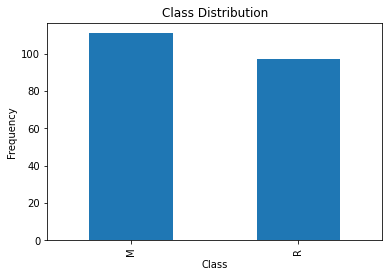

In [5]:
class_counts = df[60].value_counts()

# plot the class counts as a bar chart
class_counts.plot(kind='bar')

# set the x-axis and y-axis labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')

plt.show()

As we can see, the number of mines is very close to the number of rocks so no oversampling/undersampling is needed.

In order to visualize the correlation between features, we are going to use a heatmap. This will help us identify features that are highly correlated with each other, which may impact the performance of our models.

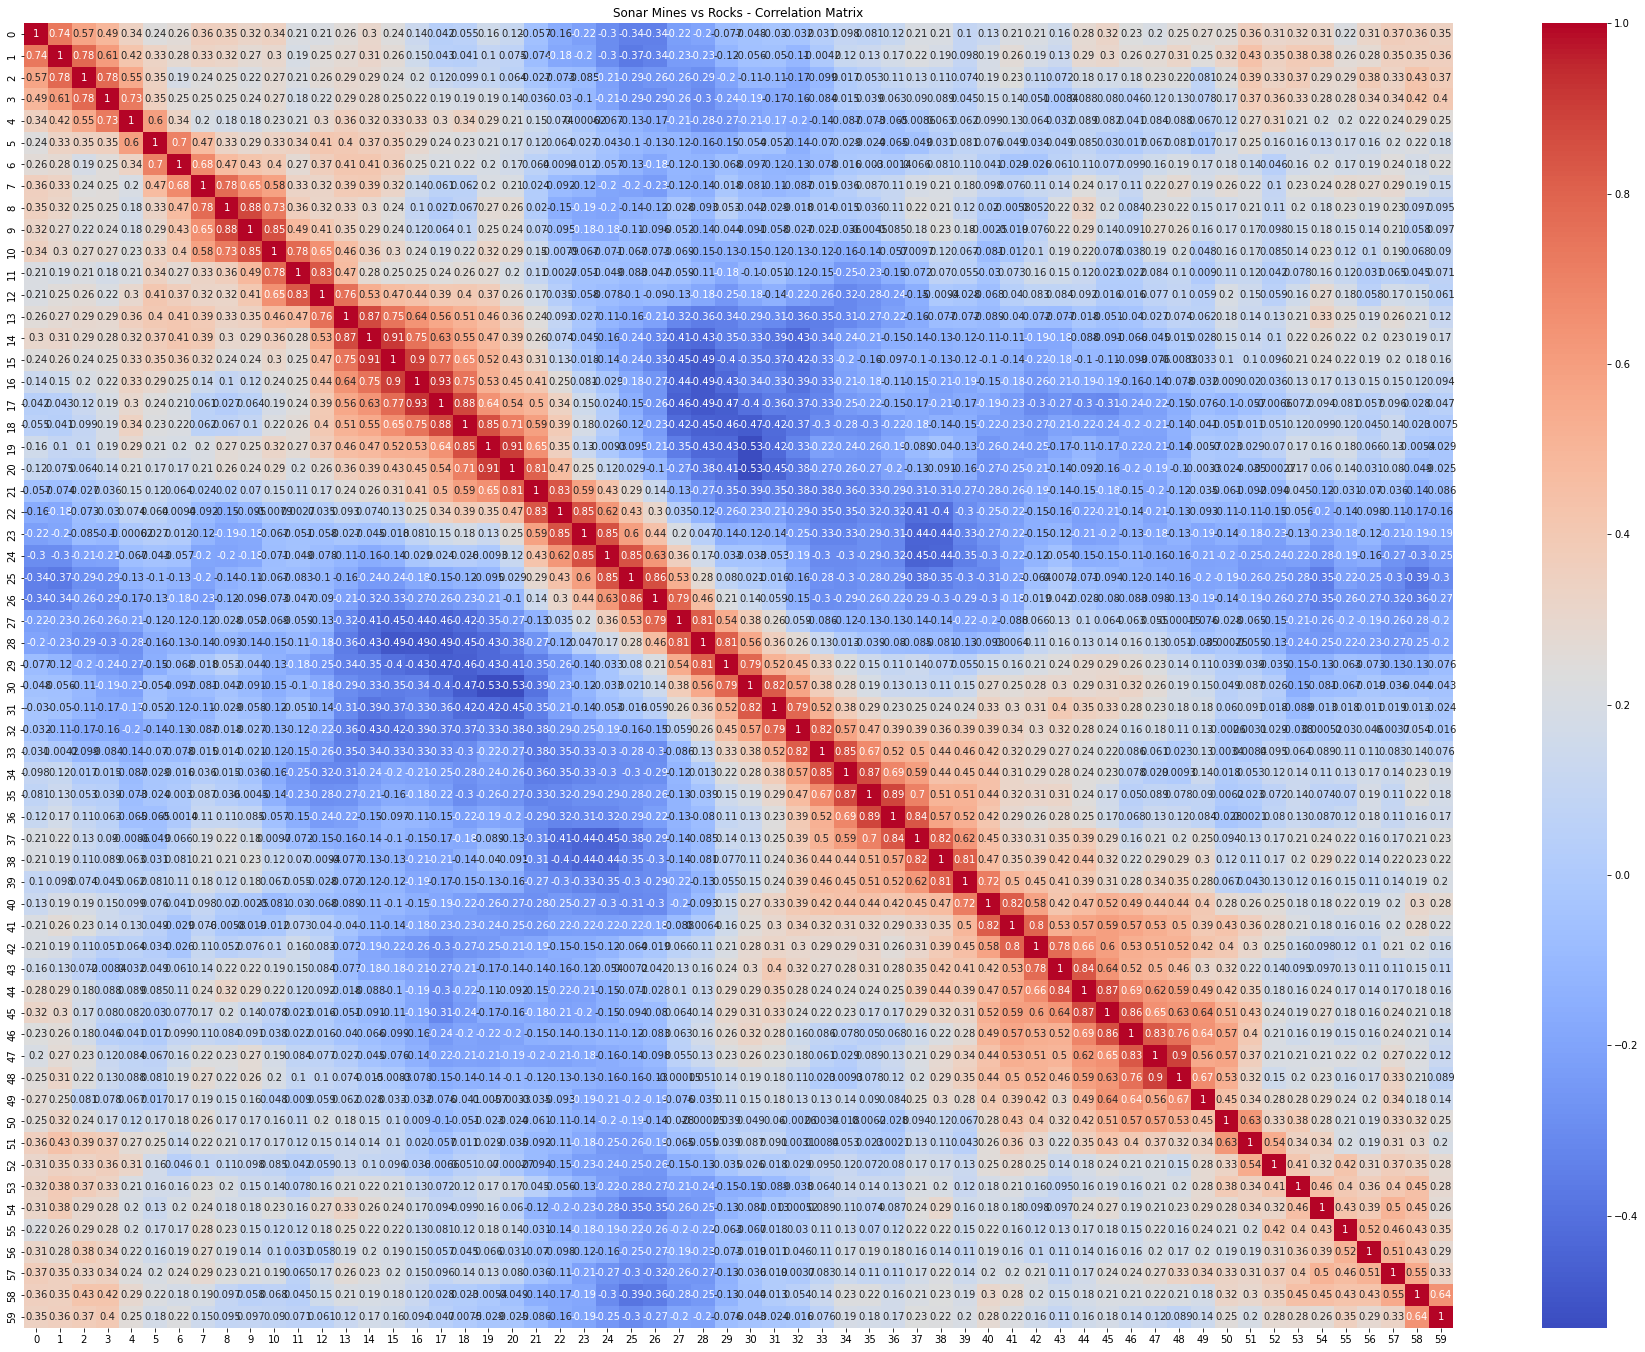

In [6]:
import seaborn as sns

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the heatmap
plt.figure(figsize=(32, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Sonar Mines vs Rocks - Correlation Matrix')

plt.show()

As it can be seen from the previous heatmap, the attributes of our data are not highly correlated. This is beneficial for several reasons. Firstly, it can improve the interpretability of the model by allowing us to understand the individual contributions of each feature to the outcome variable. Secondly, it can reduce multicollinearity, a problem that can arise when highly correlated features are included in the model, which can make it difficult to estimate the effect of each feature on the outcome variable. Thirdly, having uncorrelated features can improve the performance of the model, especially if each feature captures unique information about the outcome variable. Finally, it can lead to a simpler model that is faster and easier to deploy in practice.

## 3. Data Preprocessing

Our first step in preprocessig the data is checking for missing values and handling them in case they existed.

In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values per column
print("The number of missing values per column is:\n" + str(missing_values))

The number of missing values per column is:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
dtype: int64


As it is shown, there are no missing values in any attribute.

The second step now is to check for duplicate values and handle them.

In [8]:
# Check for duplicates
duplicates = df.duplicated()

# Print the number of duplicates
print("The number of duplicates is: ", duplicates.sum())

The number of duplicates is:  0


The datatypes of all attributes as we showed above are consistent.

In [9]:
# data types
print("Attribute information:")
print(df.dtypes)

Attribute information:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


Finally, we will check for outliers and handle them

In [10]:
# Calculate outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count number of outliers per column
num_outliers = outliers.sum(axis=0)

# Print number of outliers per column
print(num_outliers)

0     15
1     13
2     11
3     13
4      5
5      8
6      5
7     11
8      8
9     10
10     5
11     2
12     4
13     5
14     2
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     2
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     8
38     5
39     4
40     4
41     4
42     5
43    11
44    24
45    16
46    13
47     9
48     8
49    14
50     6
51    13
52     3
53     7
54     9
55     6
56     8
57     9
58    12
59     8
60     0
dtype: int64


C:\Users\HES\AppData\Local\Temp/ipykernel_10780/2481573135.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


When a column is skewed, it means that the mean is influenced by the extreme values, and replacing outliers with the mean will not be a good representation of the central tendency. 
In such cases, replacing outliers with the median is a better option because it is a robust measure of central tendency and is not affected by the extreme values.
However, if the column is not skewed, replacing outliers with the mean is a good option because it provides a good representation of the central tendency. 
The median can still be used, but the mean is preferred because it takes into account all the values in the column.


In [11]:
from scipy.stats import skew

# Set threshold for skewness
threshold = 0.5

for column in df.columns[:-1]:
    # Calculate skewness
    skewness = skew(df[column])
    
    # Check if column is skewed or not
    if skewness > threshold:
        skew_type = "positively skewed"
    elif skewness < -threshold:
        skew_type = "negatively skewed"
    else:
        skew_type = "not skewed"
    
    # Print skewness value and skewness type
    print(f"column {column} skewness: {skewness} ({skew_type})")
    
    # Replace outliers based on skewness
    if skewness > threshold:
        median = np.median(df[column])
        df[column] = np.where((df[column] < (df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))) | (df[column] > (df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))), median, df[column])
        print(f"Outliers replaced with median ({median}) in column {column}")
    elif skewness < -threshold:
        median = np.median(df[column])
        df[column] = np.where((df[column] < (df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))) | (df[column] > (df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))), median, df[column])
        print(f"Outliers replaced with median ({median}) in column {column}")
    else:
        mean = np.mean(df[column])
        df[column] = np.where((df[column] < (df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))) | (df[column] > (df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))), mean, df[column])
        print(f"Outliers replaced with mean ({mean}) in column {column}")


column 0 skewness: 2.1156890875115253 (positively skewed)
Outliers replaced with median (0.0228) in column 0
column 1 skewness: 2.1400669136398354 (positively skewed)
Outliers replaced with median (0.0308) in column 1
column 2 skewness: 2.6333506203814703 (positively skewed)
Outliers replaced with median (0.0343) in column 2
column 3 skewness: 3.377116657565115 (positively skewed)
Outliers replaced with median (0.04405) in column 3
column 4 skewness: 2.003557357611458 (positively skewed)
Outliers replaced with median (0.0625) in column 4
column 5 skewness: 1.2391464582065808 (positively skewed)
Outliers replaced with median (0.09215000000000001) in column 5
column 6 skewness: 0.9638051274311094 (positively skewed)
Outliers replaced with median (0.10694999999999999) in column 6
column 7 skewness: 1.4704041142377018 (positively skewed)
Outliers replaced with median (0.1121) in column 7
column 8 skewness: 1.6220635144705686 (positively skewed)
Outliers replaced with median (0.15225) in co

## 4. Choosing Models

We are unsure about which algorithms will perform best on this dataset, so we will train several different models on our data. We will evaluate the algorithms by comparing them. As we compute, we will display the testing accuracy of each model.
We'll pick a set of various algorithms that can handle this classification issue. The chosen 2 algorithms are:
<ol>
    <li>Logistic Regression (LR): This method creates a line or curve that separates data points into different categories based on their features. It then calculates the probability of a new data point belonging to each category and assigns it to the one with the highest probability.</li>
    <li>k-Nearest Neighbors (KNN): The kNN method finds the nearest k data points to a new point by measuring their distance. It then assigns the new point to the category with the most neighboring points.</li>
</ol>

## 5 & 6. Training the Models And Evaluating Them

We will try different combinations of percentages of training and testing data to see which one performs the best.
The different combinations are: 
<ul>
    <li>10% for testing</li>
    <li>20% for testing</li>
    <li>30% for testing</li>
</ul>


In [12]:
X=df.drop(columns=60,axis=1)
Y=df[60]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

***********************************
Test size: 0.3 

***********************************

Training and evaluating the Logistic Regression model:

We trained the model with Logistic regression:
For test size: 0.3 , the Logistic regression testing accuracy is: 0.75
To gain a deeper understanding of the model, confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.


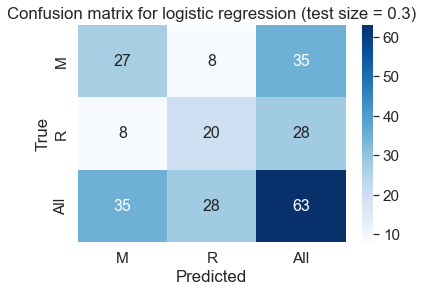


***************************************************************************


Training and evaluating k-NN classifier for different numbers of neighbors:

To know the most suitable number of neighbors, we will test the k-NN model on different numbers (from 1 till 13).
We want to find the value of k with the highest testing and training accuracy while keeping the difference between them small so that we do not fall in overfitting or underfitting.

We fit kNN classifier to the training data.
Now, we will plot the number of neighbors against accuracy to select the most suited number of neighbors.


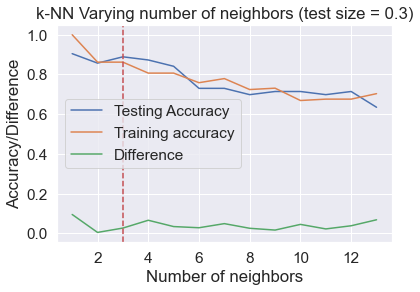

The best value of k is: 3
We will calculate the testing accuracy of the k-NN model:
For test size: 0.3 , the k-NN testing accuracy is: 0.89
The accuracy score of the k-NN was 0.89 . To gain a deeper understanding of the model, a confusion matrix through frequency tables can be seen:


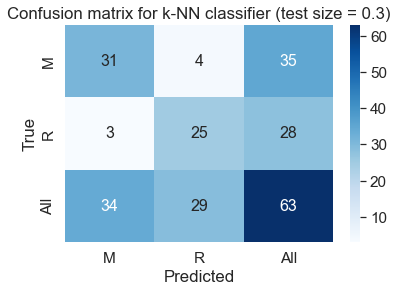

***********************************
Test size: 0.2 

***********************************

Training and evaluating the Logistic Regression model:

We trained the model with Logistic regression:
For test size: 0.2 , the Logistic regression testing accuracy is: 0.83
To gain a deeper understanding of the model, confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.


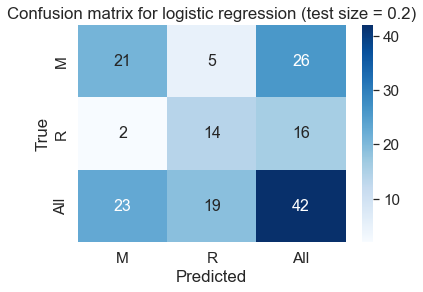


***************************************************************************


Training and evaluating k-NN classifier for different numbers of neighbors:

To know the most suitable number of neighbors, we will test the k-NN model on different numbers (from 1 till 13).
We want to find the value of k with the highest testing and training accuracy while keeping the difference between them small so that we do not fall in overfitting or underfitting.

We fit kNN classifier to the training data.
Now, we will plot the number of neighbors against accuracy to select the most suited number of neighbors.


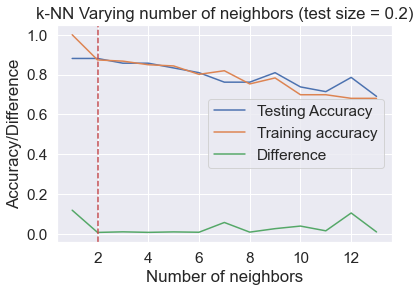

The best value of k is: 2
We will calculate the testing accuracy of the k-NN model:
For test size: 0.2 , the k-NN testing accuracy is: 0.88
The accuracy score of the k-NN was 0.88 . To gain a deeper understanding of the model, a confusion matrix through frequency tables can be seen:


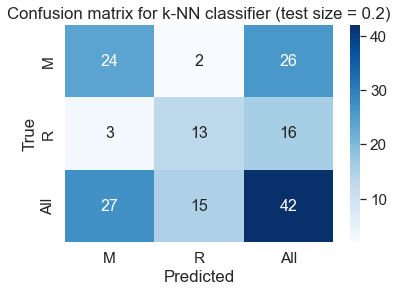

***********************************
Test size: 0.1 

***********************************

Training and evaluating the Logistic Regression model:

We trained the model with Logistic regression:
For test size: 0.1 , the Logistic regression testing accuracy is: 0.86
To gain a deeper understanding of the model, confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.


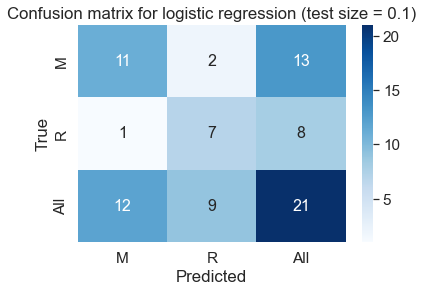


***************************************************************************


Training and evaluating k-NN classifier for different numbers of neighbors:

To know the most suitable number of neighbors, we will test the k-NN model on different numbers (from 1 till 13).
We want to find the value of k with the highest testing and training accuracy while keeping the difference between them small so that we do not fall in overfitting or underfitting.

We fit kNN classifier to the training data.
Now, we will plot the number of neighbors against accuracy to select the most suited number of neighbors.


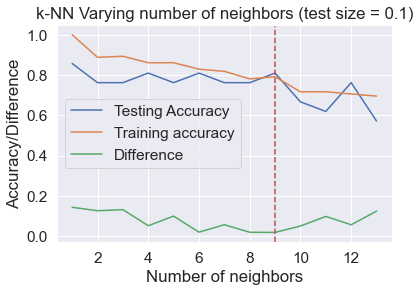

The best value of k is: 9
We will calculate the testing accuracy of the k-NN model:
For test size: 0.1 , the k-NN testing accuracy is: 0.81
The accuracy score of the k-NN was 0.81 . To gain a deeper understanding of the model, a confusion matrix through frequency tables can be seen:


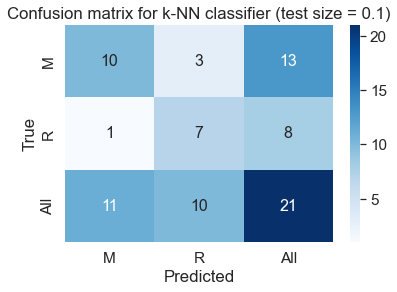

In [14]:
# Define the different test sizes we want to use
test_sizes = [0.3, 0.2, 0.1]

for test_size in test_sizes:
    print("***********************************")
    print("Test size:", test_size, "\n")
    print("***********************************")

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    
    # Train and evaluate the logistic regression model
    print("\nTraining and evaluating the Logistic Regression model:\n")
    print("We trained the model with Logistic regression:")
    model = LogisticRegression()
    model.fit(X_train,y_train)
    testing_accuracy_LR = model.score(X_test,y_test)
    print("For test size:", test_size, ", the Logistic regression testing accuracy is:", "{:.2f}".format(testing_accuracy_LR) )
    
    # Generate and display confusion matrix for logistic regression
    print("To gain a deeper understanding of the model, confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.")
    prediction = model.predict(X_test)
    cm = pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True)
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
    plt.title('Confusion matrix for logistic regression (test size = {})'.format(test_size))
    plt.show()
    print("\n***************************************************************************\n")
    print("\nTraining and evaluating k-NN classifier for different numbers of neighbors:\n")
    print("To know the most suitable number of neighbors, we will test the k-NN model on different numbers (from 1 till 13).")
    print("We want to find the value of k with the highest testing and training accuracy while keeping the difference between them small so that we do not fall in overfitting or underfitting.")
    print("\nWe fit kNN classifier to the training data.")
    # Train and evaluate k-NN classifier for different numbers of neighbors
    neighbors = np.arange(1,14)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    diff_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
        diff_accuracy[i] = abs(train_accuracy[i] - test_accuracy[i])
    
    # Find the index of k with the highest testing accuracy and the smallest difference between testing and training accuracy
    print("Now, we will plot the number of neighbors against accuracy to select the most suited number of neighbors.")
    best_k_index = np.argmax(test_accuracy - diff_accuracy)
    best_k = neighbors[best_k_index]
    
    plt.title('k-NN Varying number of neighbors (test size = {})'.format(test_size))
    plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label='Training accuracy')
    plt.plot(neighbors, diff_accuracy, label='Difference')

    plt.legend()
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy/Difference')
    plt.axvline(x=best_k, color='r', linestyle='--')
    plt.show()
    print("The best value of k is:", best_k)

    
    # Generate and display confusion matrix for k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("We will calculate the testing accuracy of the k-NN model:")
    test_accuracy_KNN= knn.score(X_test,y_test)
    print("For test size:", test_size, ", the k-NN testing accuracy is:", "{:.2f}".format(test_accuracy_KNN) )
    print("The accuracy score of the k-NN was",  "{:.2f}".format(test_accuracy_KNN), ". To gain a deeper understanding of the model, a confusion matrix through frequency tables can be seen:")

    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, fmt='g', cmap="Blues")
    plt.title('Confusion matrix for k-NN classifier (test size = {})'.format(test_size))
    plt.show()

It could be seen that between the 2 models, k-NN performed generally better than Logistic Regression in terms of accurately distinguishing rocks from mines. Furthermore, it gave the highest accuracy when splitting using 70% for training and 30% for testing with an accuracy score of 0.89

## 7. Tuning the Parameters

In [15]:
print("Tuning Logistic Regression Parameters\n\n")

# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
hyperparameters = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'max_iter': [5000]
}

test_sizes = [0.3, 0.2, 0.1]

for test_size in test_sizes:
    print("***********************************")
    print("Test size:", test_size, "\n")
    print("***********************************")

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Create a logistic regression model
    logreg = LogisticRegression()

    # Use GridSearchCV to find the best hyperparameters
    clf = GridSearchCV(logreg, hyperparameters, cv=5)
    clf.fit(X_train, y_train)

    # Print the best hyperparameters
    print('Best parameters:', clf.best_params_)

    # Train a new model with the best hyperparameters
    best_logreg = LogisticRegression(**clf.best_params_)
    best_logreg.fit(X_train, y_train)

    # Evaluate the final model on the testing set
    score = best_logreg.score(X_test, y_test)
    print('Accuracy:', "{:.2f}".format(score))
    

Tuning Logistic Regression Parameters


***********************************
Test size: 0.3 

***********************************
Best parameters: {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.83
***********************************
Test size: 0.2 

***********************************
Best parameters: {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.88
***********************************
Test size: 0.1 

***********************************
Best parameters: {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.86


In [16]:
# Define the parameter grid to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance']}

test_sizes = [0.3, 0.2, 0.1]

for test_size in test_sizes:
    print("***********************************")
    print("Test size:", test_size, "\n")
    print("***********************************")
    
    # Define the KNN model
    knn = KNeighborsClassifier()
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    
    # Perform grid search using cross-validation
    grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print("Best parameters:", grid_search.best_params_)
    
    # Train a new model with the best parameters
    best_knn = KNeighborsClassifier(**grid_search.best_params_)
    best_knn.fit(X_train, y_train)

    # Evaluate the final model on the testing set
    score = best_knn.score(X_test, y_test)
    print('Testing accuracy:', "{:.2f}".format(score))

***********************************
Test size: 0.3 

***********************************
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Testing accuracy: 0.90
***********************************
Test size: 0.2 

***********************************
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Testing accuracy: 0.88
***********************************
Test size: 0.1 

***********************************
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Testing accuracy: 0.86


As it can be seen, before tuning the parameters we had the following:

<table>
    <thead>
        <tr>
            <th></th>
            <th>k-NN testing accuracy</th>
            <th>LR testing accuracy</th>
        </tr>
    </thead>
    <tbody>
    <tr>
      <td>30% testing</td>
      <td>0.89</td>
      <td>0.75</td>
    </tr>
    <tr>
      <td>20% testing</td>
      <td>0.88</td>
      <td>0.83</td>
    </tr>
    <tr>
      <td>10% testing</td>
      <td>0.81</td>
      <td>0.86</td>
    </tr>
    </tbody>
</table>


After tuning the parameters, the testing accuracy increased to become the following:
<table>
    <thead>
        <tr>
            <th></th>
            <th>k-NN testing accuracy</th>
            <th>LR testing accuracy</th>
        </tr>
    </thead>
    <tbody>
    <tr>
      <td>30% testing</td>
      <td>0.90</td>
      <td>0.83</td>
    </tr>
    <tr>
      <td>20% testing</td>
      <td>0.88</td>
      <td>0.88</td>
    </tr>
    <tr>
      <td>10% testing</td>
      <td>0.86</td>
      <td>0.86</td>
    </tr>
    </tbody>
</table>


This indicates that tuning the parameters was successful as it increased the accuracy of both of our models.

## 8. Making Predictions

To make predictions on the new inhanced models, we will use the LR model with 20% testing data size as it gave the highest testing accuracy among all the logistic regression models.
Furthermore, we will use the k-NN model with 30% testing data size as it gave the highest testing accuracy among all the k-NN models.
We will provide the models with the best parameters that we got while tuning the parameters.
We will make prediction on the first value of the testing data set shown below:

In [17]:
print(X_test.iloc[0])

0     0.03050
1     0.03630
2     0.02140
3     0.02270
4     0.04560
5     0.06650
6     0.09390
7     0.09720
8     0.25350
9     0.31270
10    0.21920
11    0.26210
12    0.24190
13    0.21790
14    0.11590
15    0.12370
16    0.08860
17    0.17550
18    0.17580
19    0.15400
20    0.05120
21    0.18050
22    0.40390
23    0.56970
24    0.65770
25    0.74740
26    0.85430
27    0.90850
28    0.86680
29    0.88920
30    0.90650
31    0.85220
32    0.72040
33    0.62000
34    0.62530
35    0.68480
36    0.73370
37    0.62810
38    0.57250
39    0.61190
40    0.55970
41    0.49650
42    0.50270
43    0.17770
44    0.14800
45    0.12135
46    0.10165
47    0.07810
48    0.04470
49    0.04240
50    0.02710
51    0.02000
52    0.00700
53    0.00700
54    0.00860
55    0.00890
56    0.00740
57    0.00420
58    0.00550
59    0.00210
Name: 161, dtype: float64


In [18]:
print("Making predictions using LR with 20% testing data and best parameters for the model:")

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# create a logistic regression model with specific hyperparameters
logreg = LogisticRegression(C=10, max_iter=5000, penalty='l2', solver='newton-cg')

# fit the model to the training data
logreg.fit(X_train, y_train)

input_data= (0.03050, 0.0363, 0.0214, 0.0227, 0.0456, 0.0665, 0.0939, 0.0972, 0.2535, 0.3127, 0.2192, 0.2621, 0.2419, 0.2179, 0.1159, 0.1237, 0.0886, 0.1755, 0.1758, 0.154, 0.0512, 0.1805, 0.4039, 0.5697, 0.6577, 0.7474, 0.8543, 0.9085, 0.8668, 0.8892, 0.9065, 0.8522, 0.7204, 0.62, 0.6253, 0.6848, 0.7337, 0.6281, 0.5725, 0.6119, 0.5597, 0.4965, 0.5027, 0.1777, 0.148, 0.12135, 0.10165, 0.0781, 0.0447, 0.0424, 0.0271, 0.02, 0.007, 0.007, 0.0086, 0.0089, 0.0074, 0.0042, 0.0055, 0.0021)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
if(prediction[0] == "R"):
    print("The object is a Rock")
else:
    print("The object is a Mine")

Making predictions using LR with 20% testing data and best parameters for the model:
The object is a Mine


In [19]:
print("Making predictions using KNN with 30% testing data and best parameters for the model:")

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# create a knn model with specific hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=1, weights='uniform')

# fit the model to the training data
knn_model.fit(X_train, y_train)

input_data= (0.03050, 0.0363, 0.0214, 0.0227, 0.0456, 0.0665, 0.0939, 0.0972, 0.2535, 0.3127, 0.2192, 0.2621, 0.2419, 0.2179, 0.1159, 0.1237, 0.0886, 0.1755, 0.1758, 0.154, 0.0512, 0.1805, 0.4039, 0.5697, 0.6577, 0.7474, 0.8543, 0.9085, 0.8668, 0.8892, 0.9065, 0.8522, 0.7204, 0.62, 0.6253, 0.6848, 0.7337, 0.6281, 0.5725, 0.6119, 0.5597, 0.4965, 0.5027, 0.1777, 0.148, 0.12135, 0.10165, 0.0781, 0.0447, 0.0424, 0.0271, 0.02, 0.007, 0.007, 0.0086, 0.0089, 0.0074, 0.0042, 0.0055, 0.0021)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
if(prediction[0] == "R"):
    print("The object is a Rock")
else:
    print("The object is a Mine")

Making predictions using KNN with 30% testing data and best parameters for the model:
The object is a Mine


To see if our predictions are true, we will print its value in the y_test set:

In [20]:
print(y_test.iloc[0])

M


Indeed, the object was a mine and our two models predicted correctly.